# Simple Harmonic Oscillator-
*To Obtain and Plot the Eigenstates, <br>
*To find the Classical Probability Density for Energy Eigen Value, <br> 
*To Compare and rRepresent graphically, the Eigen Energy states for classical HO and QHO


In [61]:
#To import various required packages
import numpy
import matplotlib
import matplotlib.pyplot as plt
import math            #math module defines mathematical functions (i.e., trigonometric functions, logarithmic functions, angle conversion functions, etc).
import numpy.polynomial.hermite as Herm     #This module provides a number of functions useful for dealing with Hermite series to encapsulate the arithmetic operations

# To find the eigenstates of the SHO by using Hermite polynomials <br>

We know that the Time independent, normalized stationary states for the SHO are given in terms of Hermite polynomials, Hn(ξ), so, <br> 
The nth eigenstate for SHO is defined as for (def stationary_state(x,n));<br>

$\psi_{n}(x)=(\frac{m\omega}{\pi\hbar})^\frac{1}{4}\frac{1}{\sqrt{2^n n!}}H_{n}(\xi)e^\frac{-\xi^2}{2}$<br>

where, $H_n$ are Hermite polynomials; given as $H_{n}(\xi)$ is, (def hermite(x, n)) <br>

Here, The Hermite polynomials are generated by using the recurrence relation called as Hermite Equation,<br>

$H_{n+1}(\xi)=2xH_{n}(\xi)- 2nH_{n-1}(\xi)$

where,$\xi$ is, <br>

$\xi=\sqrt{\frac{m\omega}{\hbar}}x$<br>

The solutions for Hermite equations are known to be Hermite polynomials, and we find the Hermite polynamial for n=1, $H_2{(\xi)}$,<br>

$H_2{(\xi)}=4{\xi}^2-2$

Hence, our Eigen state for $H_2{(\xi)}$,<br>

$\psi_{1}(x)=(\frac{m\omega}{\pi\hbar})^\frac{1}{4}\frac{1}{\sqrt{2^1 1!}}H_{2}(\xi)e^\frac{-\xi^2}{2}$<br>

$\psi_{1}(x)=(\frac{4}{pi})^\frac{1}{4}((\frac{m\omega}{\hbar})^3)^\frac{1}{4}xe^\frac{-mwx^2}{2\hbar}$<br>




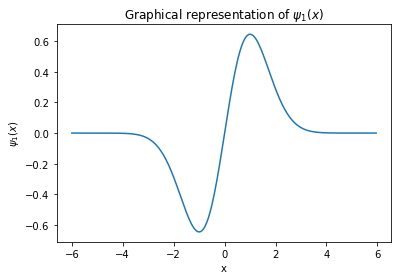

In [62]:
#We choose simple units for the time independent, normalized stationary states of SHO Hn(ξ), by ξ=√(mω/ℏ)

m=1.
w=1.
hbar=1.
# In Discrete space measurement of the position of macroscpic SHO in infinitesimal range of dx at x
dx = 0.05
x_lim = 6
x = numpy.arange(-x_lim,x_lim,dx)

def hermite(x, n):              
    xi = numpy.sqrt(m*w/hbar)*x    
    herm_coeffs = numpy.zeros(n+1)  
    herm_coeffs[n] = 1             
    return Herm.hermval(xi, herm_coeffs)  #hermval(x, c[, tensor]) (To Evaluate an Hermite series at points x)
  
def stationary_state(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    prefactor = 1./math.sqrt(2.**n * math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = prefactor * numpy.exp(- xi**2 / 2) * hermite(x,n)
    return psi

plt.figure()
plt.plot(x, stationary_state(x,1))
plt.xlabel(r"x")
plt.ylabel(r"$\psi_1(x)$") #$\ this sign is used to represent the wave function (psi)
plt.title(r"Graphical representation of $\psi_1(x)$")
plt.show()

# To find the Classical probability denisty for Energy Eigen states of Harmonic Oscillator
Now, we will try to obtain the classical probability denisty for Energy Eigen states of Harmonic Oscillator,<br>
As we know the Energy Eigen equation for Harmonic oscillator, defined as; <br>

$E_n=\hbar\omega(n+(\frac{1}{2}))$

Classical probability density density predicts that the harmonic oscillator is to be found near classical turning points where HO stops in result of losing its kinetic energy.

Hence, we will try to get the classical probability density for the first excited state of harmonic oscillator, n=1,<br>

then, $E_1=\frac{3}{2}\hbar\omega$ (n=0,1,2....any state it can be)

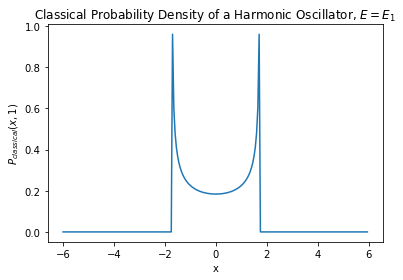

In [63]:
#The classical probability density for a particle with an energy equal to that of the n^th quantum harmonic oscillator energy level.
# The same units of m, w and hbar are choosen for ξ,

def classical_P(x,n): 
    E = hbar*w*(n+0.5)
    x_max = numpy.sqrt(2*E/(m*w**2))
    classical_prob = numpy.zeros(x.shape[0])
    x_inside = abs(x) < (x_max - 0.025)
    classical_prob[x_inside] = 1./numpy.pi/numpy.sqrt(x_max**2-x[x_inside]*x[x_inside])
    return classical_prob

plt.figure()
plt.plot(x, classical_P(x,1))
plt.xlabel(r"x")
plt.title(r"Classical Probability Density of a Harmonic Oscillator, $E=E_1$")
plt.ylabel(r"$P_{classical}(x,1)$")
plt.show()

# Comparing Classical vs. Quantum Harmonic Results

We are going to compare the behavior of a quantum harmonic oscillator to a classical harmonic oscillator,
For a classical harmonic oscillator with energy  E , the classical probability of finding the particle at x is;<br> 

$Xmax=\sqrt\frac{2E}{mω^2}$<br>

where,  Xmax  is the classical turning point, and  classical(x) probability is understood to be zero for  |X|>|Xmax| .

The energy level for n^th quantum harmonic oscillator is presented as;

$E_n=\hbar\omega(n+(\frac{1}{2}))$

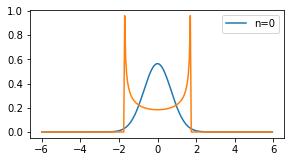

In [64]:
plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
plt.plot(x, numpy.conjugate(stationary_state(x,0))*stationary_state(x,0), label="n=0")
plt.plot(x, classical_P(x,1))
plt.legend()

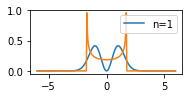

In [65]:
plt.subplot(3,2,2)
plt.plot(x, numpy.conjugate(stationary_state(x,1))*stationary_state(x,1), label="n=1")
plt.plot(x, classical_P(x,1))
plt.legend()        

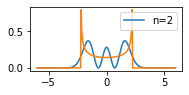

In [66]:
plt.subplot(3,2,3)
plt.plot(x, numpy.conjugate(stationary_state(x,2))*stationary_state(x,2), label="n=2")
plt.plot(x, classical_P(x,2))
plt.legend()

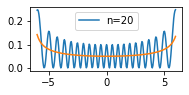

In [67]:
plt.subplot(3,2,4)
plt.plot(x, numpy.conjugate(stationary_state(x,20))*stationary_state(x,20), label="n=20")
plt.plot(x, classical_P(x,20))
plt.legend()

# Conclusive Summary For Comparsion
In the harmonic oscillator, we have tried to see that at which energies do classical and quantum physics most agree, and at which energies do they most strongly diverge, Based on the above graphs, we describe some of the differences predicted by quantum and classical physics for the harmonic oscillator.

The difference between quantum and classical physics is most distinct for the lower energy levels, where quantum mechanics does not at all obey the classical intuition that particles spend most of their time near the classical turning point. At very high energies though, the general shape of the quantum probability distribution starts to look more like the classical result.

Hence, It is obvious from the graphs, that a classical harmonic oscillator can possess any energy. In particular, there is no minimum allowable energy,<br>
whereas, In the quantum harmonic oscillator, the minimum energy (ground state energy, vacuum energy) is 
$E_0=(\frac{1}{2})\hbar\omega$ .